In [2]:
import networkx as nx

from collections import defaultdict, Counter
import json
import numpy as np
from typing import Dict, Any
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
with open("/Users/artemmerinov/data/holoassist/data-annotation-trainval-v1_1.json") as f:
    raw_annt = json.load(f)

In [4]:
"63dadf73854ea6f46afaa3b7"

'63dadf73854ea6f46afaa3b7'

In [14]:
task_types = defaultdict(list)

for video_id in range(len(raw_annt)):
    task_id = raw_annt[video_id]["taskId"]

    cga_sequence = []
    if task_id == "63dadf73854ea6f46afaa3b7":
        
        # cga_sequence.append(video_name)
    
        for event in raw_annt[video_id]['events']:
            if event["label"] == "Coarse grained action":
                verb = event["attributes"]["Verb"]
                noun = event["attributes"]["Noun"]
                action = verb + "-" + noun
                cga_sequence.append(action)
        break

In [16]:
cga_sequence

['turn_on-printer', 'load-paper_stack', 'turn_off-printer']

In [19]:
raw_annt[video_id]["video_name"]


'R080-21July-BigPrinter'

In [320]:
task_types = defaultdict(list)

for video_id in range(len(raw_annt)):
    task_type = raw_annt[video_id]["taskType"]
    video_name = raw_annt[video_id]["video_name"]

    cga_sequence = []
    # cga_sequence.append(video_name)
    
    for event in raw_annt[video_id]['events']:
        if event["label"] == "Coarse grained action":
            verb = event["attributes"]["Verb"]
            noun = event["attributes"]["Noun"]
            action = verb + "-" + noun
            cga_sequence.append(action)
            
    
    task_types[task_type].append(cga_sequence)

In [321]:
for seq in task_types["setup big printer"]:
    print(seq)

['turn_on-printer', 'turn_off-printer', 'load-paper_stack']
['turn_on-printer', 'turn_off-printer', 'load-paper_stack']
['turn_on-printer', 'turn_off-printer', 'load-paper_stack']
['turn_on-printer', 'turn_off-printer', 'load-paper_stack']
['turn_on-printer', 'turn_off-printer', 'load-paper_stack']
['turn_on-printer', 'turn_off-printer', 'load-paper_stack']
['turn_on-printer', 'load-paper_stack', 'turn_off-printer']
['turn_on-printer', 'load-paper_stack', 'turn_off-printer']
['turn_on-printer', 'turn_off-printer', 'load-paper_stack']
['turn_on-printer', 'turn_off-printer', 'load-paper_stack']
['turn_on-printer', 'load-paper_stack', 'turn_off-printer']
['turn_on-printer', 'turn_off-printer', 'load-paper_stack']
['turn_on-printer', 'turn_off-printer', 'load-paper_stack']
['turn_on-printer', 'turn_off-printer', 'grab-paper_stack', 'load-paper_stack']
['turn_on-printer', 'turn_off-printer', 'load-paper_stack']
['turn_on-printer', 'turn_off-printer', 'load-paper_stack']
['turn_on-printer', 

In [324]:
def plot_steep_function(sequences):
    # Convert sequences to DataFrame
    max_len = max(len(seq) for seq in sequences)
    data = pd.DataFrame([seq + [None]*(max_len - len(seq)) for seq in sequences])

    # Create a step matrix
    actions = sorted(set(action for seq in sequences for action in seq))
    step_matrix = pd.DataFrame(0, index=actions, columns=range(max_len))

    for i, seq in enumerate(sequences):
        for j, action in enumerate(seq):
            step_matrix.at[action, j] += 1

    # Sort actions based on count
    action_counts = step_matrix.sum(axis=1)
    sorted_actions = action_counts.sort_values(ascending=False).index
    step_matrix = step_matrix.reindex(sorted_actions)

    plt.figure(figsize=(8, 4))
    sns.heatmap(step_matrix, annot=True, fmt="d", cmap="Reds", cbar=False, linewidths=.5)
    plt.xlabel('Step Order')
    plt.ylabel('Action')
    plt.title('Step Matrix')
    plt.show()

    return step_matrix


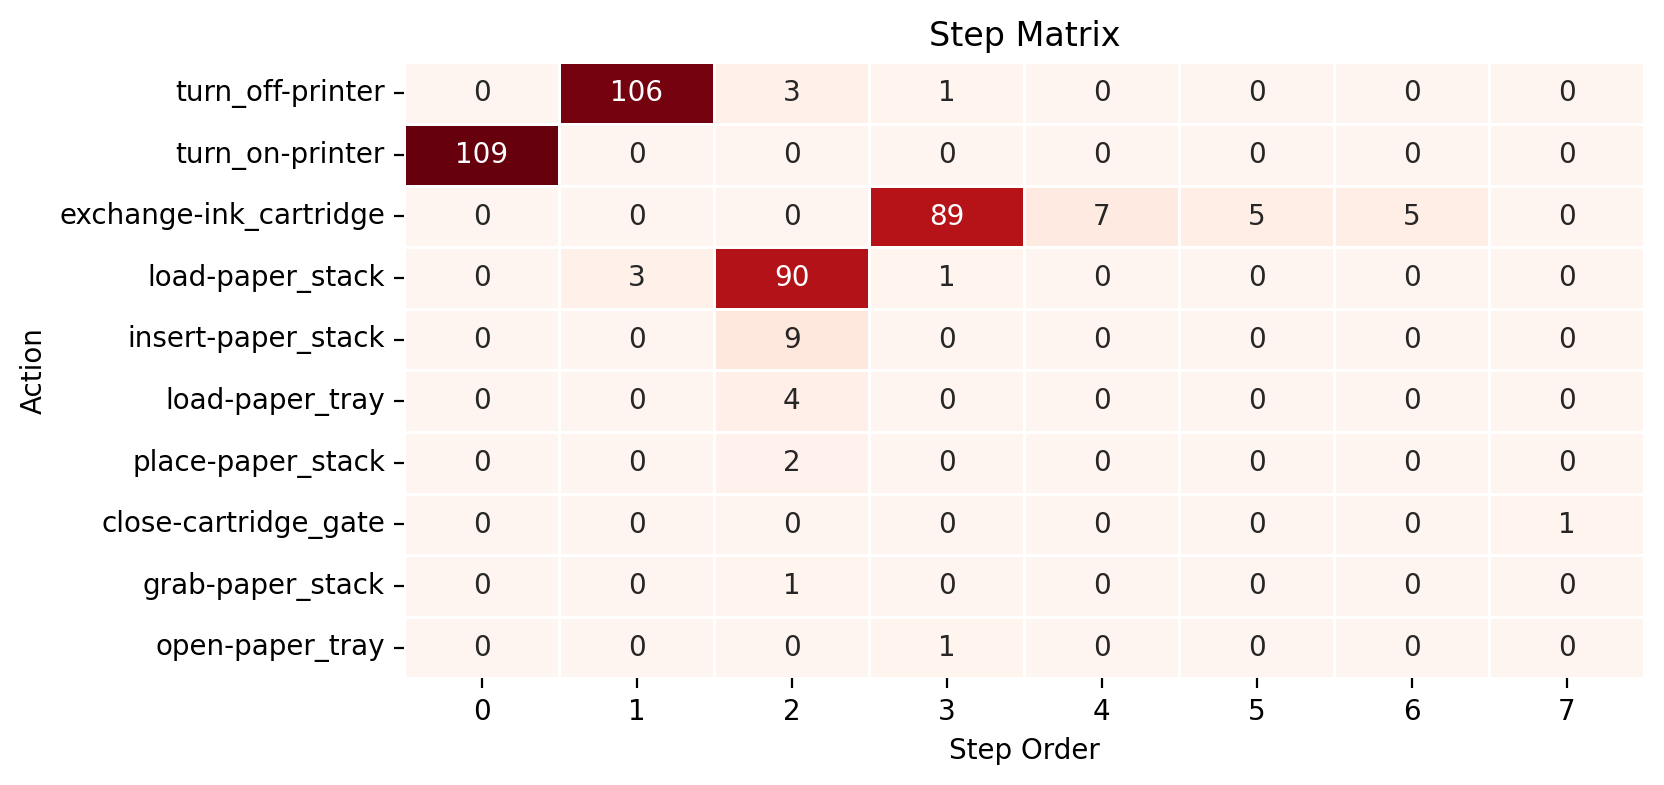

In [325]:
step_matrix = plot_steep_function(task_types["setup big printer"])

# Check the FGAs in one CGA

e.g. load paper_stack

In [326]:
cga_timings = {}

for video in raw_annt:
    
    video_events = video["events"]
    video_name = video["video_name"]
    
    for event in video_events:
        if event["label"] == "Coarse grained action":
            action = event["attributes"]["Verb"] + " " + event["attributes"]["Noun"]
            if action == "load paper_stack":
                st = event["start"]
                en = event["end"]
                cga_timings[video_name] = [st, en]

In [327]:
fga_actions_sequences = []
for video in raw_annt:

    fga_actions_seq = []

    video_events = video["events"]
    video_name = video["video_name"]
    
    if video_name in cga_timings:
        cga_st, cga_en = cga_timings[video_name]

        for event in video_events:
            if event["label"] == "Fine grained action":
                action = event["attributes"]["Verb"] + " " + event["attributes"]["Noun"]
                st = event["start"]
                en = event["end"]
                mistake = int(event["attributes"]["Action Correctness"] != "Correct Action")
                if st >= cga_st and st <= cga_en:
                    fga_actions_seq.append((action, mistake))
    
    if fga_actions_seq:
        fga_actions_sequences.append(fga_actions_seq)

In [328]:
for seq in fga_actions_sequences:
    print(seq)

[('grab paper_stack', 0), ('lift paper_tray', 1), ('open paper_tray', 1), ('close paper_tray', 0), ('open paper_tray', 1), ('insert paper_stack', 1), ('withdraw paper_stack', 0), ('close paper_tray', 0), ('open paper_tray', 1), ('open paper_tray', 0), ('close paper_tray', 0), ('pull paper_tray', 0), ('insert paper_stack', 0), ('close paper_tray', 0)]
[('grab paper_stack', 0), ('touch paper_tray', 0), ('open paper_tray', 1), ('close paper_tray', 0), ('grab paper_tray', 1), ('open paper_tray', 1), ('insert paper_stack', 1), ('withdraw paper_stack', 1), ('close paper_tray', 1), ('open paper_tray', 0), ('place paper_stack', 0), ('close paper_tray', 0)]
[('grab paper_stack', 0), ('hold paper_stack', 0), ('open paper_tray', 1), ('close paper_tray', 1), ('open paper_tray', 1), ('close paper_tray', 1), ('inspect paper_tray', 0), ('open paper_tray', 0), ('insert paper_stack', 0), ('close paper_tray', 0)]
[('grab paper_stack', 0), ('lift paper_stack', 0), ('align paper_stack', 0), ('grab paper_t